# <u> Unit 6 Notebook</u>: Creating Sampling Distributions - Building Blocks for Inference - 

## <u> Case Study 1</u>: UIUC Course Enrollment Sampling Distribution of Sample Means
* Create a sampling distribution of sample means of course enrollments. The samples should all be of size <u>n=10</u> and should be drawn with replacement from the artificial UIUC class population.
* Create a sampling distribution of sample means of course enrollments. The samples should all be of size <u>n=100</u> and should be drawn with replacement from the artificial UIUC class population.
* Create a sampling distribution of sample means of course enrollments. The samples should all be of size <u>n=400</u> and should be drawn with replacement from the artificial UIUC class population.
* **What happens to the mean, spread, and shape of the sampling distribution of sample means as the sizes of the samples (n) in the sampling distribution increases?**


## <u> Case Study 2</u>: Coin Flip Outcome Sampling Distribution of Sample Proportions
* Create a sampling distribution of sample proportion of heads. The samples should all be of size <u>n=10</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail).
* Create a sampling distribution of proportion of heads. The samples should all be of size <u>n=100</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail)
* Create a sampling distribution of proportion of heads. The samples should all be of size <u>n=400</u> and should be drawn with replacement from the population of coin flip possibilities (ie. head or tail)
* **What happens to the mean, spread, and shape of the sampling distribution of sample proportion as the sizes of the samples (n) in the sampling distribution increases?**



## <u> Information</u>
<!--# STAT 207: Data Science Exploration-->

Flow control methods such as for loops allow us to automate repetitive operations. When running simulations this allows us to repeatedly sample from data either to test out a sampling model or to construct resampling based inferences such as the bootstrap, which will be discussed in later chapters. 

We use Python functions constantly, and a valuable feature of Python and many programming languages is the ability to build our own functions to perform frequent specialized tasks.

In this section we first introduce how for loops work, then develop a small function for Monte Carlo sampling from a data frame. Then we use this to investigate the sample distributions of sample means and proportions for random samples of varying sample sizes, when sampling with replacement.

Using Monte Carlo simulation we demonstrate the square root rule for the standard deviation of the mean and the approximate normal distribution of the sample mean of a large sample. This latter approximation is consistent with the Central Limit Theorem from probability theory.

## 1. <u> Notation</u>: Summary statistics for Population vs. Samples

See the Unit 6 slides (section 1).

## 2. <u> Definition</u>: Sampling Distribution

See the Unit 6 slides (section 2).

## 3. <u> Type of Sampling Distribution</u>: Sampling Distribution of Sample Means - How to create one?

See the Unit 6 slides (section 3).

<u>Optional Supplementary Information</u>:
The sample mean is common statistic used to summarize the central tendancies of particular variables in the data. When the data are drawn from a larger population at random, the sample mean provides an estimate of the mean for the whole population. In a sample survey the sample that we get from the population is random, and woul be different if we were to repeat the sampling process. However, if the *sample* is large enough then sample statistics will tend to be close to the correpsonding population parameters, and the variation in the sample statistics is predictable.

**Example:** the proportion of voting age citizens who support a given policy in a population can be thought of as the mean of all the 0/1 indicators for whether each citizen supports the policy. 1 means they support it; 0 means they don't. The average of all these 0s and 1s is the proportion supporting the policy. If we draw a random sample from the population, the sample proportion is the sample mean of all the 0's and 1's selected for the sample. How much variation is there in this sample proportion due to the random sampling? We investigate questions like these through simulation. Later we will see that theory provides precise information about the variation in the sample proportion.

Before specifically addressing the special case of the sample proportion, let's consider the case of sample means for variables in data frames in general. We set up a Monte Carlo simulation scheme in which we repeatedly draw random samples and see how the resulting sample means vary. 


## 4. <u>More about for loops</u>


In order to do simulations we use Python's flow control to allow us to repeatedly draw samples. The **for** loop is fundamental in many programming languages. Here's a simple version. Notice that for Python the **colon (:)** and **indentation** are important. The indentation needs to be 4 characters wide! The notebook formats this automatically. 

### 4.1 For loops with a list

In [1]:
for x in ["Fido", "Rex", "Mitzi", "Fluffy", "Mr. Lizard"]:
    print("Here ", x, "!", sep="")

Here Fido!
Here Rex!
Here Mitzi!
Here Fluffy!
Here Mr. Lizard!


### 4.2 For loops with a range
Here's another example, with the same general principle that the for loop passes through all the values in the "in" list.

In [2]:
for i in range(5):
    print("Hello Fidotron-R", i, ", welcome!", sep="")

Hello Fidotron-R0, welcome!
Hello Fidotron-R1, welcome!
Hello Fidotron-R2, welcome!
Hello Fidotron-R3, welcome!
Hello Fidotron-R4, welcome!


The for loop allows us to do an operation repeatedly by stepping through a finite list. This is extremely useful for performing computer simulations in which we repeatedly draw samples and study the the effects of random variation on the statistics.

## 5. <u> Case Study</u>: Sampling Distribution of Sample Means - What happened to the mean, standard deviation, and shape of the sampling distribution of sample means as we increased the size of the samples n?


### 5.1 Population and population mean

#### 5.1.1 Creating the population

First let's create our artificial UIUC population again. In this case study we will be considering the population of *enrollments* (ie. a population of *numerical data*).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
# create a data frame for illustration and testing
courses = ['adv307', 'badm210', 'badm210', 'badm210', 
           'cs105', 'cs105', 'stat107', 'stat207']
sections = ['A', 'A', 'B', 'C', 'A', 'B', 'A', 'A']
enrollments = [37, 215, 178, 197, 345, 201, 197, 53]
sectdf = pd.DataFrame({'course': courses, 
                       'section': sections, 
                       'enrolled': enrollments})
sectdf

,course,section,enrolled
0,adv307,A,37
1,badm210,A,215
2,badm210,B,178
3,badm210,C,197
4,cs105,A,345
5,cs105,B,201
6,stat107,A,197
7,stat207,A,53


#### 5.1.2 What is the population mean enrollment?

* The population mean is *usually* unknown, because the population is usually too large to collect.
* Thus, the population mean is *usually* a population parameter we are trying to make an inference, *using* a sample drawn from this population.
* For now, we will assume we know the population mean so we can explore what happens to the sampling distribution and how it related to the population mean.

In [5]:
sectdf['enrolled'].mean()

177.875

#### So we will say that $\mu=177.875$.

#### 5.1.3. What is the population standard deviation enrollment?

* The population standard deviation is *usually* unknown, because the population is usually too large to collect.
* For now, we will assume we know the population standard deviation.

In [6]:
sectdf['enrolled'].std()

97.11177286287914

#### So we will say that $\sigma=97.11$.

#### 5.1.4. What is the shape of the population distribution of enrollments?

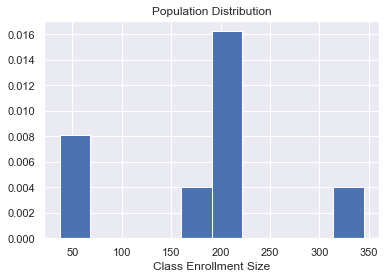

In [7]:
sectdf['enrolled'].hist(density=True)
plt.title('Population Distribution')
plt.xlabel('Class Enrollment Size')
plt.show()

### 5.2. Creating a sampling distribution of sample means with samples of size n=10. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?
Let's generate 5 random samples form the data frame and calculate the corresponding sample means. This is a very simple example of a Monte Carlo simulation.

We use a for loop where we initialize an empty array, SampleMeans, and then iterate a sepcified number of times. To understand how each step works you might find it helpful to break out the individual steps and run them with different values of the iteration variable i. 

#### 5.2.1 <u> Step-by-step</u>:  Let's create a sampling distribution with M=5 sample means

In [8]:
# iterate 5 times
x = 'enrolled'
SampleMeans = []
for i in range(5):
    print('Trial Number:',i)
    #1. Collect a random sample of size n=10 with replacement from the population of enrollments
    rand_sample=sectdf[x].sample(10, replace=True)
    print('Random Sample')
    print(rand_sample)
    
    #2. Take the mean of this random sample
    rand_sample_mean=rand_sample.mean()
    print('Random Sample Mean')
    print(rand_sample_mean)
    
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(rand_sample_mean)
    print('Current Sampling Distribution List')
    print(SampleMeans)
    print('---------')
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')
print(pd.DataFrame({x: SampleMeans}))

Trial Number: 0
Random Sample
7     53
1    215
3    197
5    201
3    197
2    178
2    178
0     37
6    197
3    197
Name: enrolled, dtype: int64
Random Sample Mean
165.0
Current Sampling Distribution List
[165.0]
---------
Trial Number: 1
Random Sample
1    215
7     53
0     37
6    197
6    197
6    197
5    201
3    197
5    201
5    201
Name: enrolled, dtype: int64
Random Sample Mean
169.6
Current Sampling Distribution List
[165.0, 169.6]
---------
Trial Number: 2
Random Sample
2    178
2    178
5    201
4    345
3    197
3    197
1    215
6    197
6    197
0     37
Name: enrolled, dtype: int64
Random Sample Mean
194.2
Current Sampling Distribution List
[165.0, 169.6, 194.2]
---------
Trial Number: 3
Random Sample
6    197
5    201
5    201
7     53
3    197
2    178
4    345
0     37
3    197
2    178
Name: enrolled, dtype: int64
Random Sample Mean
178.4
Current Sampling Distribution List
[165.0, 169.6, 194.2, 178.4]
---------
Trial Number: 4
Random Sample
6    197
4    345
4 

#### 5.2.2 <u>More Consise Code</u>: Let's rerun this same code, but write it in a more consise way.

**Note:** Remember, this will not give us the same sampling distribution as the code above, because we did not set a random_state and the **.sample()** function returns random results.

In [9]:
# iterate 5 times
x = 'enrolled'
SampleMeans = []
for i in range(5):
    #1. Collect a random sample of size n=10 with replacement
    #2. Take the mean of this random sample
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(sectdf[x].sample(10, replace=True).mean())

    
    
    
    
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')
print(pd.DataFrame({x: SampleMeans}))

Sampling Distribution of Sample Means (samples of size n=10)
   enrolled
0     212.4
1     167.6
2     184.1
3     140.2
4     122.1


#### 5.2.3. <u>Sampling Distribution with M=1000 Sample Means</u>: 
Using M=5 trials (ie. M=5 sample means) to create a sampling distribution is usually not enough to gain a good representation of a sampling distribution's behavior. Let's run the code below using M=1000 trials (ie. M=1000 sample means).

In [10]:
# iterate 1000 times
# parametrize the sample size. number of random samples, 
# and the variable name
x = 'enrolled'
n=10
M=1000
SampleMeans = []
for i in range(M):
    #1. Collect a random sample of size n=10 with replacement
    #2. Take the mean of this random sample
    #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
    SampleMeans.append(sectdf[x].sample(n, replace=True).mean())

#4. print out in a dataframe
print('Sampling Distribution of Sample Means (samples of size n=10)')    
MonteCarlo = pd.DataFrame({x: SampleMeans})
MonteCarlo

Sampling Distribution of Sample Means (samples of size n=10)


,enrolled
0,179.9
1,229.0
2,199.5
3,192.7
4,195.0
...,...
995,210.1
996,170.0
997,167.1
998,148.5


In [11]:
MonteCarlo.shape

(1000, 1)

#### 5.2.4 <u>Making our own functions to Create a Sampling Distribution of Sample Means</u>

If we want to try lots of different values for n and M it gets tedious to keep copying the code and changing the parameters in multiple locations. Instead, we can make our own function to do this kind of task with varying inputs. This saves a lot of redundant effort. It also makes it easier to understand and debug the code. 

Here's a function to do the Monte carlo simulation of the sample mean for different sample sizes and numbers of Monte Carlo samples. Notice that we input the data frame (or data series), variable name x as a text string, sample size n, and number of Monte Carlo samples M. Here again, the **colon (:)** and **indentation (4 characters)** are important to indicate that the ensuing lines of code are included in the function.

In [12]:
def MCmeans(df, x='', replace=True, n=1, M=1):
    #INPUT:
    # df is a data frame
    # x is a text-valued name for a variable in the data frame
    # replace = True or False depending on whether 
    #    draws are with or without replacement
    # n = number of draws per sample
    # M = number of samples to draw
    MCstats = []
    for i in range(M):
        #1. Collect a random sample of size n=10 with replacement
        #2. Take the mean of this random sample
        #3. Append this random sample mean to the SampleMeans list (which is our SAMPLING DISTRIBUTION OF SAMPLE MEANS!)
        MCstats.append(df[x].sample(n, replace=replace).mean())
    #4. returns the sampling distribution in a dataframe format
    return pd.DataFrame({x: MCstats})

In [13]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=10, M=10000)

MonteCarlo

,enrolled
0,176.8
1,223.3
2,227.3
3,163.5
4,225.4
...,...
9995,141.2
9996,211.2
9997,215.0
9998,209.5


#### 5.2.5 <u>What is the mean, standard deviation, and shape of this sampling distribution of sample means when the size of the samples is n=10? </u>

#### Mean of the Sampling Distribution Means

In [14]:
MonteCarlo['enrolled'].mean()

178.11037

#### Standard Deviation of the Sampling Distribution Means

In [15]:
MonteCarlo['enrolled'].std()

28.70181636916711

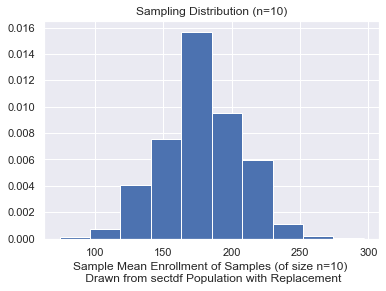

In [16]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=10)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=10) \n Drawn from sectdf Population with Replacement')
plt.show()

### 5.3. Creating a sampling distribution of sample means with samples of size n=100. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?


In [17]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=100, M=10000)
MonteCarlo

,enrolled
0,167.68
1,163.65
2,174.75
3,184.11
4,178.84
...,...
9995,158.56
9996,175.84
9997,185.53
9998,163.86


In [18]:
print('Sampling Distribution Mean (Samples of Size n=100):',MonteCarlo['enrolled'].mean())
print('Sampling Distribution Standard Deviation (Samples of size n=100):',MonteCarlo['enrolled'].std())

Sampling Distribution Mean (Samples of Size n=100): 177.859012
Sampling Distribution Standard Deviation (Samples of size n=100): 9.038486359309436


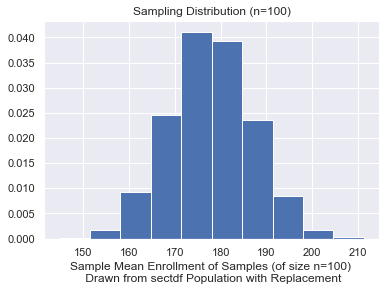

In [19]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=100)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=100) \n Drawn from sectdf Population with Replacement')
plt.show()

### 5.4. Creating a sampling distribution of sample means with samples of size n=400. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?


In [20]:
MonteCarlo = MCmeans(df=sectdf, x="enrolled", n=400, M=10000)
MonteCarlo

,enrolled
0,175.2025
1,176.8450
2,184.4900
3,171.1325
4,171.7225
...,...
9995,179.1975
9996,183.8800
9997,171.6350
9998,182.2200


In [21]:
print('Sampling Distribution Mean (Samples of Size n=400):',MonteCarlo['enrolled'].mean())
print('Sampling Distribution Standard Deviation (Samples of size n=400):',MonteCarlo['enrolled'].std())

Sampling Distribution Mean (Samples of Size n=400): 177.836558
Sampling Distribution Standard Deviation (Samples of size n=400): 4.569345136929803


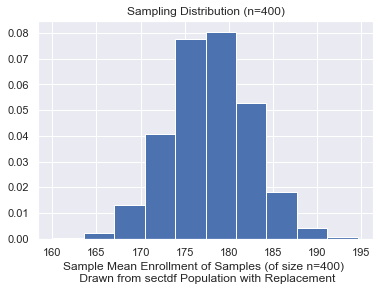

In [22]:
MonteCarlo['enrolled'].hist(density=True)
plt.title('Sampling Distribution (n=400)')
plt.xlabel('Sample Mean Enrollment of Samples (of size n=400) \n Drawn from sectdf Population with Replacement')
plt.show()

## 6. <u> Type of Sampling Distribution</u>: Sampling Distribution of Sample Proportions - How to create one?

#### See the Unit 6 slides (section 6).

If we make one draw, i.e., toss the coin once, then the uniform probability principle tells us the probability of a 1 is $p$ = 1/2. What if we draw (flip) 10 times randomly and without replacement? What proportion $\hat{p}$ of "heads" do we expect? How much is it likely to vary from this expectation? What if we toss 100 times, or 400?

Let's consider a series of sample sizes and study how the sampling distribution is affected. We'll compute mean and standard deviation of the Monte Carlo values, and look at the histrogram as well to get a picture fo the sample distributions for different sample sizes.


## 7. <u> Case Study</u>: Sampling Distribution of Sample Proportions - What happened to the mean, standard deviation, and shape of the sampling distribution of sample proportions as we increased the size of the samples n?


### 7.1 Population and population proportion of heads.

#### 7.1.1 Creating the population

With our function available we can simulate all kinds of things. Here is a "data frame" of the possible outcomes when flipping a coin.

In [23]:
df = pd.DataFrame({'toss':['heads','tails'], 'value': [1, 0]})
df

,toss,value
0,heads,1
1,tails,0


#### 7.1.2 Population Proportion of Heads

In [24]:
df['toss'].value_counts(normalize=True)

heads    0.5
tails    0.5
Name: toss, dtype: float64

#### The population proportion of heads is $p=0.5$.

### 7.2. Creating a sampling distribution of sample proportions with samples of size n=10. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?


#### 7.2.1.<u>Step-by-step</u> Let's create a sampling distribution with M=5 sample proportions.



In [25]:
# iterate 5 times
x = 'value'
SampleProportions = []
for i in range(5):
    print('Trial Number:',i)
    #1. Collect a random sample of size n=10 with replacement from the population of enrollments
    rand_sample=df[x].sample(10, replace=True)
    print('Random Sample')
    print(rand_sample)
    
    #2. Find the sample proportion of heads
    # proportion of observations that are equal to 1 (ie. heads) = mean of values in this sample
    rand_sample_proportion=rand_sample.mean()
    print('Random Sample Proportion')
    print(rand_sample_proportion)
    
    #3. Append this random sample proportions to the SampleProportions list (which is our SAMPLING DISTRIBUTION OF SAMPLE PROPORTIONS!)
    SampleProportions.append(rand_sample_proportion)
    print('Current Sampling Distribution List')
    print(SampleProportions)
    print('---------')
    
#4. print out in a dataframe
print('Sampling Distribution of Sample Proportions (samples of size n=10)')
print(pd.DataFrame({x: SampleProportions}))

Trial Number: 0
Random Sample
0    1
1    0
1    0
0    1
0    1
1    0
1    0
1    0
0    1
0    1
Name: value, dtype: int64
Random Sample Proportion
0.5
Current Sampling Distribution List
[0.5]
---------
Trial Number: 1
Random Sample
0    1
0    1
0    1
1    0
0    1
0    1
1    0
0    1
1    0
0    1
Name: value, dtype: int64
Random Sample Proportion
0.7
Current Sampling Distribution List
[0.5, 0.7]
---------
Trial Number: 2
Random Sample
1    0
0    1
1    0
0    1
1    0
1    0
0    1
0    1
1    0
1    0
Name: value, dtype: int64
Random Sample Proportion
0.4
Current Sampling Distribution List
[0.5, 0.7, 0.4]
---------
Trial Number: 3
Random Sample
1    0
1    0
0    1
0    1
1    0
0    1
1    0
1    0
1    0
0    1
Name: value, dtype: int64
Random Sample Proportion
0.4
Current Sampling Distribution List
[0.5, 0.7, 0.4, 0.4]
---------
Trial Number: 4
Random Sample
1    0
0    1
0    1
1    0
0    1
1    0
1    0
1    0
0    1
0    1
Name: value, dtype: int64
Random Sample Propor

#### 7.2.2 <u> Using the Function</u>:

Because the **sample proportion of "1"'s** in a column of 0/1 values = **sample mean** of the column of 0/1 values, we can create a our sampling distribution of sample proportions the same way (and with the same function) that we used to quickly create a sampling distribution of sample means.

In [26]:
MonteCarlo = MCmeans(df=df, x="value", n=10, M=10000)
MonteCarlo

,value
0,0.2
1,0.6
2,0.5
3,0.7
4,0.5
...,...
9995,0.4
9996,0.3
9997,0.4
9998,0.3


#### 7.2.3 What is the mean, standard deviation, and shape of the sampling distribution of sample proportions?

In [27]:
print('Sample size = ', 10)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  10
Mean value for sample proportion = 0.49942
Standard Deviation for sample proportion = 0.15771


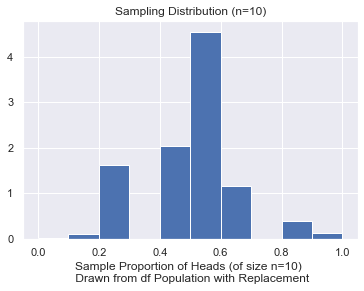

In [28]:
MonteCarlo['value'].hist(density=True)
plt.title('Sampling Distribution (n=10)')
plt.xlabel('Sample Proportion of Heads (of size n=10) \n Drawn from df Population with Replacement')
plt.show()

### 7.3. Creating a sampling distribution of sample proportions with samples of size n=100. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

In [29]:
MonteCarlo = MCmeans(df=df, x="value", n=100, M=10000)
MonteCarlo

,value
0,0.52
1,0.49
2,0.52
3,0.51
4,0.52
...,...
9995,0.55
9996,0.51
9997,0.55
9998,0.51


In [30]:
print('Sample size = ', 100)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  100
Mean value for sample proportion = 0.49947
Standard Deviation for sample proportion = 0.04968


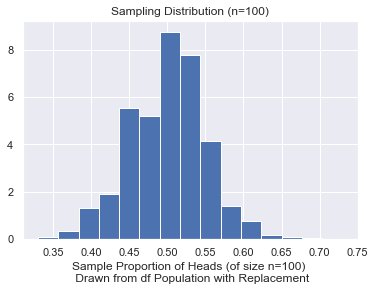

In [31]:
MonteCarlo['value'].hist(density=True, bins=15)
plt.title('Sampling Distribution (n=100)')
plt.xlabel('Sample Proportion of Heads (of size n=100) \n Drawn from df Population with Replacement')
plt.show()

### 7.4. Creating a sampling distribution of sample proportions with samples of size n=400. What is the mean, standard deviation, and shape of the sample means in this sampling distribution?

In [32]:
MonteCarlo = MCmeans(df=df, x="value", n=400, M=10000)
MonteCarlo

,value
0,0.4950
1,0.5625
2,0.5075
3,0.5175
4,0.4600
...,...
9995,0.4675
9996,0.5150
9997,0.5225
9998,0.4650


In [33]:
print('Sample size = ', 400)
print('Mean value for sample proportion =', 
      np.round(MonteCarlo.mean().value, 5))
print('Standard Deviation for sample proportion =', 
      np.round(MonteCarlo.std().value, 5))

Sample size =  400
Mean value for sample proportion = 0.49989
Standard Deviation for sample proportion = 0.02495


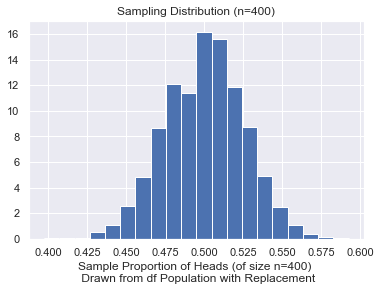

In [34]:
MonteCarlo['value'].hist(density=True, bins=20)
plt.title('Sampling Distribution (n=400)')
plt.xlabel('Sample Proportion of Heads (of size n=400) \n Drawn from df Population with Replacement')
plt.show()

---
STAT 207, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign